In [1]:
# Data preprocessing 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
import matplotlib.pyplot as plt

heart = np.genfromtxt("heart.csv", delimiter=',', skip_header=1)
X=heart[:, :-1]
y=heart[:, -1]

print(f'X Shape: {X.shape}, y shape: {y.shape}')
print(f'Number of patients with heart disease {np.sum(y)}')
print(f'Percentage of patients with heart disease {(np.sum(y) / X.shape[0]):.3}')

# 80/20 train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=9)

print(f'X Train Shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'X Test Shape: {X_test.shape}, y test shape: {y_test.shape}')
print(f'Number of patients with heart disease (training) {np.sum(y_train)}')
print(f'Number of patients with heart disease (test) {np.sum(y_test)}')

X Shape: (1025, 13), y shape: (1025,)
Number of patients with heart disease 526.0
Percentage of patients with heart disease 0.513
X Train Shape: (820, 13), y train shape: (820,)
X Test Shape: (205, 13), y test shape: (205,)
Number of patients with heart disease (training) 411.0
Number of patients with heart disease (test) 115.0


In [2]:
#Initial Plots to explore data 
import pandas as pd
df=pd.read_csv("heart.csv")
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


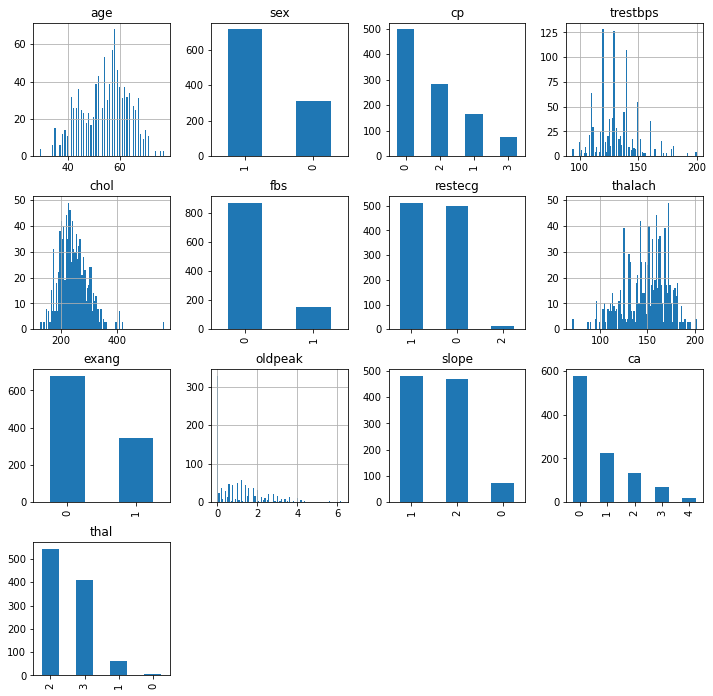

In [3]:
fig, axes = plt.subplots(len(df.columns)//3, 4, figsize=(12, 12))

i = 0
for triaxis in axes:
    for axis in triaxis:
        if i>13:
          break
        if df.columns[i] in ["age","trestbps","chol","thalach","oldpeak"]:
          df.hist(column = df.columns[i], bins = 100, ax=axis)
        else:
          df[df.columns[i]].value_counts().plot(ax=axis,kind='bar')
          axis.set_title(df.columns[i])
        
        i+=1

fig.delaxes(axes[3,1])
        
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,3])


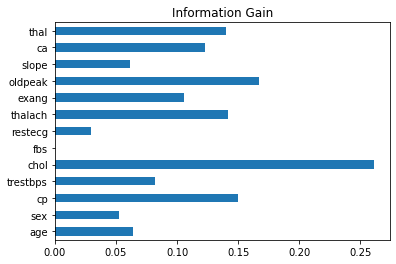

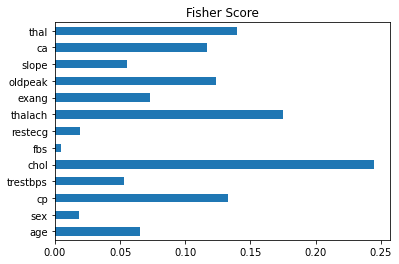

<AxesSubplot:>

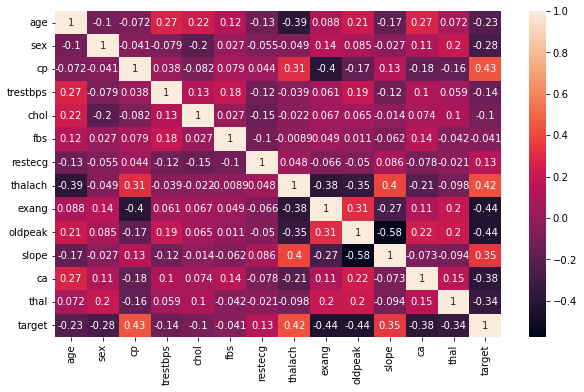

In [20]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X,y)
feature_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feature_importances.plot(kind='barh',title="Information Gain")
plt.show()

from skfeature.function.similarity_based import fisher_score
importances=mutual_info_classif(X_train,y_train)
feature_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feature_importances.plot(kind='barh',title="Fisher Score")
plt.show()

import seaborn as sns 
cor=df.corr()
plt.figure(figsize= (10,6))
sns.heatmap(cor,annot=True)



In [5]:
from sklearn.feature_selection import VarianceThreshold

v_threshold=VarianceThreshold()
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LASSO = LogisticRegression(C=1, penalty='l1', solver='liblinear', fit_intercept=True, max_iter=1000)
LASSO.fit(X_train, y_train)
print(f'test score={LASSO.score(X_test, y_test):.3}')
print(f'Coeffeicients: {np.round(LASSO.coef_,3)}')
y_hat = LASSO.predict(X_test)
print(confusion_matrix(y_test, y_hat))

test score=0.883
Coeffeicients: [[ 0.004 -1.811  0.804 -0.015 -0.005 -0.09   0.377  0.031 -0.874 -0.494
   0.456 -0.683 -0.761]]
[[ 76  14]
 [ 10 105]]


In [7]:
import statsmodels.api as sm

model = LogisticRegression(fit_intercept=True, max_iter=1000)
model.fit(X_train, y_train)
print(f'training score={model.score(X_test, y_test)}')

logitmodel=sm.Logit(y_train, sm.add_constant(X_train)).fit()
logitmodel.summary()

training score=0.8780487804878049
Optimization terminated successfully.
         Current function value: 0.360479
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  820
Model:                          Logit   Df Residuals:                      806
Method:                           MLE   Df Model:                           13
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.4799
Time:                        12:42:47   Log-Likelihood:                -295.59
converged:                       True   LL-Null:                       -568.38
Covariance Type:            nonrobust   LLR p-value:                3.001e-108
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5274      1.548      2.278      0.023       0.493       6.562
x1            -0.0072      0.014     -0.514      0.607      -0.035       0.020
x2            -1.9938      0.291     -6.860      0.000      -2.564      -1.424
x3             0.8372      0.107      7.809      0.000       0.627       1.047
x4            -0.0184      0.006     -2.943      0.003      -0.031      -0.006
x5            -0.0061      0.002     -2.632      0.008      -0.011      -0.002
x6            -0.1645      0.313     -0.526      0.599      -0.777       0.448
x7             0.3663      0.208      1.759      0.079      -0.042       0.775
x8             0.0256      0.006      4.062      0.000       0.013       0.038
x9            -0.9955      0.246     -4.053      0.000      -1.477      -0.514
x10           -0.5289      0.126     -4.201      0.000      -0.776      -0.282
x11            0.4651      0.214      2.178      0.029       0.046       0.884
x12           -0.7075      0.112     -6.312      0.000      -0.927      -0.488
x13           -0.8508      0.170     -4.993      0.000      -1.185      -0.517
==============================================================================
"""

In [8]:
temp_Xtrain=pd.DataFrame(X_train)
temp_Xtrain.drop(0, inplace=True,axis=1)
temp_Xtrain.drop(5, inplace=True,axis=1)
temp_Xtrain.drop(6, inplace=True,axis=1)

temp_Xtest=pd.DataFrame(X_test)
temp_Xtest.drop(0, inplace=True,axis=1)
temp_Xtest.drop(5, inplace=True,axis=1)
temp_Xtest.drop(6, inplace=True,axis=1)


model = LogisticRegression(fit_intercept=True, max_iter=1000)
model.fit(temp_Xtrain, y_train)
print(f'training score={model.score(temp_Xtest, y_test)}')
logitmodel=sm.Logit(y_train, sm.add_constant(temp_Xtrain)).fit()
logitmodel.summary()

training score=0.8731707317073171
Optimization terminated successfully.
         Current function value: 0.362899
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  820
Model:                          Logit   Df Residuals:                      809
Method:                           MLE   Df Model:                           10
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.4764
Time:                        12:42:48   Log-Likelihood:                -297.58
converged:                       True   LL-Null:                       -568.38
Covariance Type:            nonrobust   LLR p-value:                5.616e-110
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4459      1.274      2.704      0.007       0.948       5.943
1             -2.0341      0.288     -7.072      0.000      -2.598      -1.470
2              0.8177      0.105      7.792      0.000       0.612       1.023
3             -0.0204      0.006     -3.416      0.001      -0.032      -0.009
4             -0.0072      0.002     -3.196      0.001      -0.012      -0.003
7              0.0272      0.006      4.685      0.000       0.016       0.039
8             -0.9631      0.242     -3.981      0.000      -1.437      -0.489
9             -0.5065      0.123     -4.109      0.000      -0.748      -0.265
10             0.5164      0.209      2.473      0.013       0.107       0.926
11            -0.7182      0.110     -6.528      0.000      -0.934      -0.503
12            -0.8064      0.163     -4.937      0.000      -1.127      -0.486
==============================================================================
"""

In [9]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB



from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs=EFS(GaussianNB(),
        min_features=5,max_features=13,scoring="accuracy",cv=5)


efs = efs.fit(X_train, y_train)

print("Naive Bayes score: ",efs.best_score_)
print("Best: ",efs.best_score_)
print('Best subset (indices):', efs.best_idx_)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_score = gnb.predict_proba(X_test)



print("Naive Bayes score: ",format(gnb.score(X_test, y_test),".4f"))
from sklearn.metrics import confusion_matrix
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))

Features: 7099/7099

Naive Bayes score:  0.8487804878048781
Best:  0.8487804878048781
Best subset (indices): (0, 1, 2, 3, 4, 7, 9, 10, 11, 12)
Naive Bayes score:  0.8683
[[ 74  16]
 [ 11 104]]


In [10]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)

# Train a KNN classifier on the selected features

for neighbor in range (1, 20):
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_new, y_train)
    print(f'{neighbor}: {np.round(np.mean(cross_val_score(knn, X_train, y_train, cv=3)),3)}')

1: 0.927
2: 0.844
3: 0.779
4: 0.729
5: 0.689
6: 0.661
7: 0.659
8: 0.663
9: 0.67
10: 0.687
11: 0.69
12: 0.693
13: 0.688
14: 0.706
15: 0.699
16: 0.699
17: 0.691
18: 0.678
19: 0.693


In [11]:
#Accuracy Score for KNN
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("P(classification) 2 Neighbors =", np.round(accuracy_score(y_test, y_pred), 3))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

P(classification) 2 Neighbors = 0.951
Confusion matrix: 
 [[ 90   0]
 [ 10 105]]


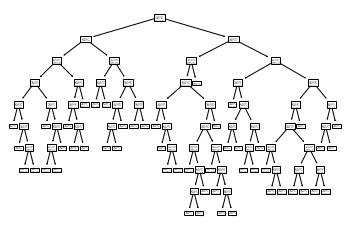

Confusion Matrix: 
[[ 87   3]
 [  0 115]]
Accuracy: 98.54%
[0.08816281 0.05587491 0.26441056 0.06003279 0.07879529 0.
 0.02605452 0.07794256 0.01642413 0.09034943 0.04333804 0.09206413
 0.10655084]
Confusion Matrix: 
[[ 87   3]
 [  0 115]]
Accuracy: 98.53658536585365%


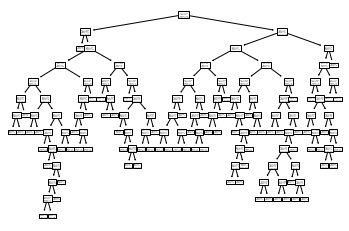

In [12]:
# Decision Tree and Random Forests
# fit
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=9)
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

#model 
from sklearn.tree import plot_tree
plot_tree(clf)
plt.show()


#accuracy and confusion matrix
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(X_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

print(clf.feature_importances_)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, oob_score=True)
clf = clf.fit(X_train, y_train)

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(X_test,y_test)
y_hat = clf.predict(X_test)
print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(acc*100) + '%')
plot_tree(clf.estimators_[0])
plt.show()


In [13]:
# Deep Neural Net
import tensorflow as tf
from tensorflow import keras
# 80/20 train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
x_train_s = scaler.fit_transform(X_train)
x_test_s = scaler.fit_transform(X_test)


net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(13, input_dim=13, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
net.summary()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# fit the keras model on the dataset
net.fit(x_train_s, y_train, epochs=150, batch_size=30)

: 

In [ ]:
# score
score = net.evaluate(x_test_s, y_test, verbose=0)
print("Test loss:", format(score[0],".4f"))
print(f'Test accuracy: {score[1]:.3}')

from sklearn.metrics import confusion_matrix
yhat = net.predict(x_test_s)
yhat = np.round(yhat)
Cmat = confusion_matrix(y_test, yhat)
Cmat

: 

: 

: 